<a href="https://colab.research.google.com/github/Mithra09/TrailExplorer/blob/main/EV_Charging_bunks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
# loading the dataset
df=pd.read_csv('/content/ev-charging-stations-india.csv')

In [3]:
#read dataset
df= pd.read_csv('/content/ev-charging-stations-india.csv')

In [4]:
#displaying first few rows of dataset
df.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [5]:
#displaying number of rows & columns
df.shape

(1547, 7)

In [6]:
#state wise numbers
df.state.value_counts()

,count
state,
Maharashtra,259
Tamil Nadu,155
Karnataka,134
Delhi,126
Kerala,91
Uttar Pradesh,87
Gujarat,77
Telangana,75
Rajasthan,68


In [7]:
#After evaluation the state names are having some errors, some are city names, some are mispelled lets correct them.

In [8]:
#make the text in column more consistent
df['state'] = df['state'].str.lower().str.strip()

In [9]:
#create a state map for more consistencies
state_mapping = {
     'andaman': 'Andaman and Nicobar Islands',
    'andhra pradesh': 'Andhra Pradesh',
    'andra pradesh': 'Andhra Pradesh',
    'andhrapradesh': 'Andhra Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'chandigarh': 'Chandigarh',
    'chattisgarh': 'Chhattisgarh',
    'chattisgarh': 'Chhattisgarh',
    'delhi': 'Delhi',
    'delhi ncr': 'Delhi',
    'goa': 'Goa',
    'gujarat': 'Gujarat',
    'haryana': 'Haryana',
    'hyderabad':'Telangana',
    'himachal pradesh': 'Himachal Pradesh',
    'jammu': 'Jammu and Kashmir',
    'jammu & kashmir': 'Jammu and Kashmir',
    'jammu and kashmir': 'Jammu and Kashmir',
    'jharkhand': 'Jharkhand',
    'jajpur': 'Rajasthan',
    'karnataka': 'Karnataka',
    'karala': 'Kerala',
    'kerala': 'Kerala',
      'limbdi': 'Gujarat',
    'madhya pradesh': 'Madhya Pradesh',
    'maharashtra': 'Maharashtra',
    'maharashra': 'Maharashtra',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'odisha': 'Odisha',
    'pondicherry': 'Puducherry',
    'puducherry': 'Puducherry',
    'punjab': 'Punjab',
    'rajahmundry': 'Andhra Pradesh',
    'rajasthan': 'Rajasthan',
    'sikkim': 'Sikkim',
    'taminadu': 'Tamil Nadu',
    'tamilnadu':'Tamil Nadu',
    'tamil nadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'telengana': 'Telangana',
    'tripura': 'Tripura',
    'uttar pradesh': 'Uttar Pradesh',
    'uttarakhand': 'Uttarakhand',
    'uttrakhand': 'Uttarakhand',
      'uttarkhand': 'Uttarakhand',
    'west bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'bhubhaneswar': 'Odisha',
    'chikhali': 'Maharashtra',
    'ernakulam': 'Kerala',
    'harayana': 'Haryana',
    'hisar': 'Haryana',
    'hyderabad': 'Telangana',
    'hyderabadu00a0': 'Telangana',
    'kochi': 'Kerala',
    'tripura': 'Tripura',
    'chhattisgarh': 'Chhattisgarh',
    'Chhattisgarh': 'Chhattisgarh',
    'Jammu and Kashmir': 'Jammu and Kashmir',
    'jammu and kashmir': 'Jammu and Kashmir'
}

# Apply the mapping to the 'state' column
df['state'] = df['state'].replace(state_mapping)

In [10]:
# Grouping by state and counting the occurrences (charging stations)
STwise_charging_stations = df.groupby('state').size().reset_index(name='total-charging-stations')

In [11]:
# Display the DataFrame
print(STwise_charging_stations)

                          state  total-charging-stations
0   Andaman and Nicobar Islands                        1
1                Andhra Pradesh                       60
2                         Assam                       10
3                         Bihar                        9
4                    Chandigarh                        2
5                  Chhattisgarh                       18
6                         Delhi                      179
7                           Goa                        8
8                       Gujarat                       78
9                       Haryana                       62
10             Himachal Pradesh                        6
11            Jammu and Kashmir                        7
12                    Jharkhand                       22
13                    Karnataka                      134
14                       Kerala                       94
15               Madhya Pradesh                       20
16                  Maharashtra

In [12]:
# Sort the DataFrame by 'total-charging-stations' in descending order
states_sorted_by_stations = STwise_charging_stations.sort_values(by='total-charging-stations', ascending=False)

# Display the sorted DataFrame
print(states_sorted_by_stations)

                          state  total-charging-stations
16                  Maharashtra                      265
22                   Tamil Nadu                      183
6                         Delhi                      179
13                    Karnataka                      134
14                       Kerala                       94
25                Uttar Pradesh                       87
23                    Telangana                       82
8                       Gujarat                       78
20                    Rajasthan                       69
9                       Haryana                       62
1                Andhra Pradesh                       60
27                  West Bengal                       56
17                       Odisha                       39
26                  Uttarakhand                       26
19                       Punjab                       24
12                    Jharkhand                       22
15               Madhya Pradesh

In [13]:
# Sort the DataFrame by 'total-charging-stations' in descending order
state_most_stations = STwise_charging_stations.sort_values(by='total-charging-stations', ascending=False).head(1)

# Display the state with the most charging stations
print(state_most_stations)


          state  total-charging-stations
16  Maharashtra                      265


In [14]:
# Group by 'state' and 'city' and count the number of charging stations
citywise_charging_stations = df.groupby(['state', 'city']).size().reset_index(name='total-charging-stations')

# Sort within each state to get the city with the most charging stations
state_city_max_stations = citywise_charging_stations.loc[citywise_charging_stations.groupby('state')['total-charging-stations'].idxmax()]

# Display the result
print(state_city_max_stations)

                           state         city  total-charging-stations
0    Andaman and Nicobar Islands   Port Blair                        1
9                 Andhra Pradesh      Kurnool                        6
28                         Assam     Guwahati                        6
31                         Bihar    Bhagalpur                        2
38                    Chandigarh      chennai                        2
43                  Chhattisgarh       Raipur                        8
46                         Delhi        Delhi                       70
69                           Goa          Goa                        4
74                       Gujarat    Ahmedabad                       23
104                      Haryana      Gurgaon                       17
123             Himachal Pradesh      Kasauli                        2
125            Jammu and Kashmir        Jammu                        3
132                    Jharkhand   Jamshedpur                       10
139   

In [15]:
# Group by 'city' and count the number of charging stations
citywise_charging_stations = df['city'].value_counts().reset_index()
citywise_charging_stations.columns = ['city', 'total-charging-stations']

# Find the city with the maximum number of charging stations
city_max_stations = citywise_charging_stations.loc[citywise_charging_stations['total-charging-stations'].idxmax()]

# Display the city with the most charging stations
print(city_max_stations)

city                       Delhi
total-charging-stations       72
Name: 0, dtype: object


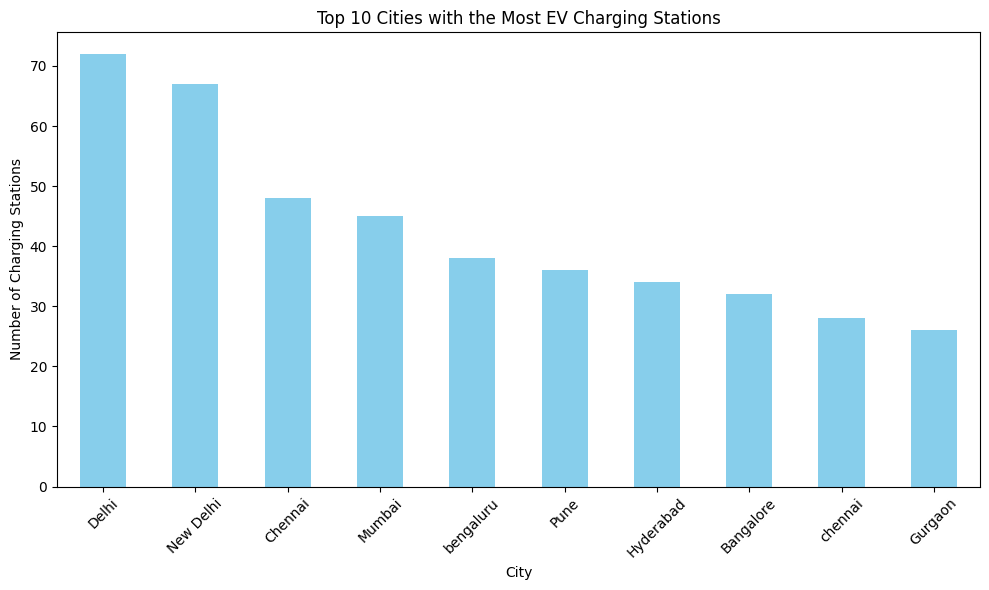

In [31]:
#Graph showing the top 10 cities
import matplotlib.pyplot as plt

# Count the number of charging stations per city
city_counts = df['city'].value_counts()

# Plot the data
plt.figure(figsize=(10,6))
city_counts.head(10).plot(kind='bar', color='skyblue')  # Show top 10 cities with the most stations
plt.title('Top 10 Cities with the Most EV Charging Stations')
plt.xlabel('City')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


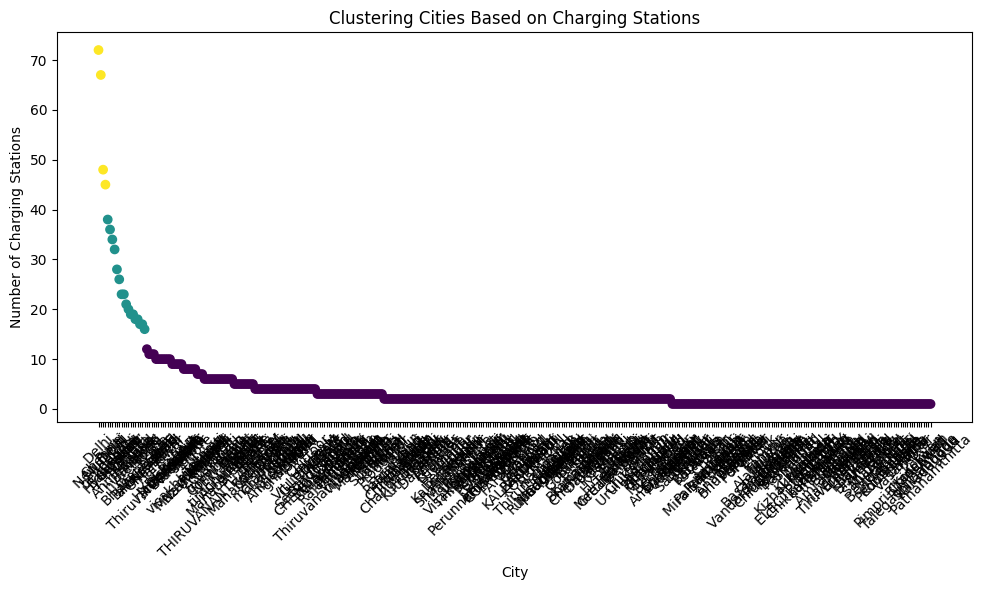

               city  charging_stations  cluster
0             Delhi                 72        2
1         New Delhi                 67        2
2           Chennai                 48        2
3            Mumbai                 45        2
4         bengaluru                 38        1
..              ...                ...      ...
357      Kosi Kalan                  1        0
358          Kotwan                  1        0
359      Shivamogga                  1        0
360      Karadagodu                  1        0
361  Pathanamthitta                  1        0

[362 rows x 3 columns]


In [37]:
#this shows which are the best choices to start the business
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Count the number of charging stations per city
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'charging_stations']

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
city_counts['cluster'] = kmeans.fit_predict(city_counts[['charging_stations']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(city_counts['city'], city_counts['charging_stations'], c=city_counts['cluster'], cmap='viridis')
plt.title('Clustering Cities Based on Charging Stations')
plt.xlabel('City')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display clustered data
print(city_counts)


In [42]:
import pandas as pd

# Load the dataset
file_path = '/mnt/data/ev-charging-stations-india.csv'
df = pd.read_csv('/content/ev-charging-stations-india.csv')

# Aggregate data by city
city_segments = df.groupby('city').agg(
    total_stations=('name', 'count')
).reset_index()
# Check the aggregated data
print(city_segments.head())


        city  total_stations
0  AHMEDABAD               2
1      ATTUR               2
2   AVINASHI               2
3   Adilabad               1
4      Adoor               1


In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
X = city_segments[['total_stations']]
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
city_segments['cluster'] = kmeans.fit_predict(X_scaled)

# Display the clusters
print(city_segments)


              city  total_stations  cluster
0        AHMEDABAD               2        0
1            ATTUR               2        0
2         AVINASHI               2        0
3         Adilabad               1        0
4            Adoor               1        0
..             ...             ...      ...
357          tirur               1        0
358        trichur               2        0
359     trivandrum               6        0
360     vijayawada               3        0
361  visakhapatnam               8        0

[362 rows x 3 columns]


In [46]:
# Profile each cluster
segment_profiles = city_segments.groupby('cluster').agg(
    total_stations_mean=('total_stations', 'mean'),
    count=('city', 'count')
).reset_index()

print(segment_profiles)

# Display the cluster profiles
for index, row in segment_profiles.iterrows():
    print(f"\nSegment {row['cluster']} Profile:")
    print(f" - Average Total Stations: {row['total_stations_mean']}")
    print(f" - Number of Cities in Segment: {row['count']}")


   cluster  total_stations_mean  count
0        0             2.668622    341
1        1            58.000000      4
2        2            23.823529     17

Segment 0.0 Profile:
 - Average Total Stations: 2.6686217008797652
 - Number of Cities in Segment: 341.0

Segment 1.0 Profile:
 - Average Total Stations: 58.0
 - Number of Cities in Segment: 4.0

Segment 2.0 Profile:
 - Average Total Stations: 23.823529411764707
 - Number of Cities in Segment: 17.0


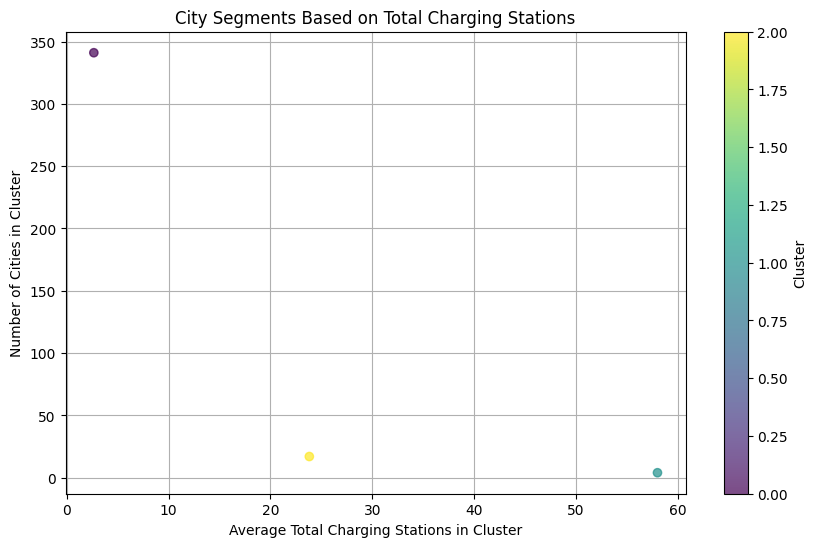

In [49]:
# Count the number of cities in each cluster
cluster_city_counts = city_segments.groupby('cluster').agg(
    total_stations_mean=('total_stations', 'mean'),
    city_count=('city', 'count')
).reset_index()

# Plotting the total charging stations mean vs. number of cities in each cluster
plt.figure(figsize=(10, 6))
plt.scatter(cluster_city_counts['total_stations_mean'], cluster_city_counts['city_count'],
            c=cluster_city_counts['cluster'], cmap='viridis', alpha=0.7)

plt.title('City Segments Based on Total Charging Stations')
plt.xlabel('Average Total Charging Stations in Cluster')
plt.ylabel('Number of Cities in Cluster')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [50]:
# Assuming 'segment_profiles' contains the profiling data from previous analysis

# Let's print the profiles to analyze
print(segment_profiles)

# Evaluate segments


   cluster  total_stations_mean  count
0        0             2.668622    341
1        1            58.000000      4
2        2            23.823529     17
